# Reading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_train_under = pd.read_pickle('drive/MyDrive/df_translated_birdie_snippet_sentiment_all.pkl')
df_train_under

,snippet,aspect_name,sentiment,lang
0,allows me to filter the notifications that rea...,filter,1.0,en
1,with a little better resolution and a few diff...,different inputs,-1.0,en
2,this is the perfect phone for my husband who d...,whistles,1.0,en
3,"i am using samsung - 58"" class - led - nu7100 ...",class - led - nu7100,0.0,en
4,the cw 70 tv has really incredible picture qua...,incredible picture quality,1.0,en
...,...,...,...,...
121129,onestamente non ci importava di questa funzione.,caratteristica,0.0,it
121130,ha fatto uscire un tecnico di ge e ha detto ch...,bene,1.0,it
121131,non so come ottengano così tante recensioni po...,recensioni,-1.0,it
121132,i vestiti sono puliti ma alcuni cicli richiedo...,a lungo,-1.0,it


# Treinando o modelo

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 81kB 4.4MB/s 
     |████████████████████████████████| 2.3MB 8.5MB/s 
     |████████████████████████████████| 1.2MB 26.7MB/s 
     |████████████████████████████████| 901kB 33.4MB/s 
     |████████████████████████████████| 3.3MB 53.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=f8c31302713ab93604a7f95d0f4412245f5f2b8eb54dd63ae18de9e4b20bfffa
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, SentencesDataset, losses, CrossEncoder
from torch.utils.data import DataLoader
from sentence_transformers.readers import InputExample
model = CrossEncoder('bert-base-multilingual-cased',num_labels=3)

train_examples = []
for index,row in df_train_under.iterrows():
  label = 1
  if row['sentiment']==-1.0: label = 0
  if row['sentiment']==0.0: label = 1
  if row['sentiment']==1.0: label = 2

  x = InputExample(texts=[row['snippet'], row['aspect_name']], label=label)
  train_examples.append(x)

train_dataset = SentencesDataset(train_examples, model)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)

# model.fit(train_dataloader=train_dataloader,
#           #evaluator=evaluator,
#           epochs=5,
#           warmup_steps=100)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
model.fit(train_dataloader=train_dataloader,
          #evaluator=evaluator,
          epochs=5,
          warmup_steps=100)

In [ ]:
!mkdir -p drive/MyDrive/sbert_multilingual_sent
model.save('drive/MyDrive/sbert_multilingual_ae/sbert_multilingual_sent_20210522_e5.mdl')

# Classificando

In [ ]:
from sentence_transformers import SentenceTransformer, SentencesDataset, losses, CrossEncoder
from torch.utils.data import DataLoader
from sentence_transformers.readers import InputExample
model = CrossEncoder('drive/MyDrive/sbert_multilingual_ae/sbert_multilingual_sent_20210522_e5.mdl',num_labels=3)

In [ ]:
import pandas as pd
df_data = pd.read_pickle('drive/MyDrive/df_german_amazon_laptops_printers_snippets_aspects_group_sbert_20210524.pkl')
df_data

,retailer,sku,review_id,url,user_id,title,body,score,category,data,posted_at,content_hash,year,month,day,lang,snippet,aspect,aspect_prob,aspect_eng_1,aspect_group_1,aspect_group_conf_1
0,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super.,Lenovo,0.979646,ubuntu,Os & Bios,0.542708
1,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super.,einfach,0.912257,easy,Usability,0.690792
2,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super!!!,Lenovo,0.978546,ubuntu,Os & Bios,0.542708
3,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super!!!,einfach,0.915465,easy,Usability,0.690792
4,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,"Würde ihn immer wieder Kaufen, vor allen wegen...",Akkuleistung,0.759075,peripherals,Peripherals,0.575870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544488,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,defekten,0.600612,defective,Performance,0.723540
2544489,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,Drucker,0.940044,printer cartridges,Ink,0.667925
2544490,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,Koszen,0.811083,kodak,Photo Printing,0.627284
2544491,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,Rücksendung,0.821631,reset,Performance,0.568526


In [ ]:
from tensorflow.keras import activations
import tensorflow
import numpy as np

df_test = pd.DataFrame()

df_test['snippet'] = ['A memória desse celular é excelente.','A tela desse celular não é boa']
df_test['aspect'] = ['memõria','tela']


train_test = []
for index,row in df_test.iterrows():
  x = [row['snippet'],row['aspect']]
  train_test.append(x)

preds = activations.softmax(tensorflow.convert_to_tensor(model.predict(train_test))).numpy()
print(np.argmax(preds,axis=1),preds)

[2 0] [[4.6541023e-05 8.3706516e-05 9.9986970e-01]
 [9.9982965e-01 1.0543359e-04 6.4864747e-05]]


In [ ]:
train_test

[['A memória desse celular é excelente.', 'memõria'],
 ['A tela desse celular não é boa', 'tela']]

In [ ]:
from tqdm.notebook import tqdm
X_test = []
for index,row in tqdm(df_data.iterrows(),total=len(df_data)):
  X_test.append([row['snippet'],row['aspect']])

In [ ]:
X_test

[['Lenovo einfach Super.', 'Lenovo'],
 ['Lenovo einfach Super.', 'einfach'],
 ['Lenovo einfach Super!!!', 'Lenovo'],
 ['Lenovo einfach Super!!!', 'einfach'],
 ['Würde ihn immer wieder Kaufen, vor allen wegen der Akkuleistung!',
  'Akkuleistung'],
 ['5 Std.', 'Std'],
 ['einfach Super für normale Anwendungen, zb.', 'einfach'],
 ['einfach Super für normale Anwendungen, zb.', 'normale'],
 ['einfach Super für normale Anwendungen, zb.', 'Anwendungen'],
 ['Surfen, Musik usw.', 'Surfen'],
 ['Surfen, Musik usw.', 'Musik'],
 ['Natürlich kann er keinen vollwertigen Laptop ersetzen aber für jene die keine zu großen Ansprüche haben und das Teil nur zum Surfen, Musik, Fotos usw.',
  'Natürlich'],
 ['Natürlich kann er keinen vollwertigen Laptop ersetzen aber für jene die keine zu großen Ansprüche haben und das Teil nur zum Surfen, Musik, Fotos usw.',
  'vollwertigen'],
 ['Natürlich kann er keinen vollwertigen Laptop ersetzen aber für jene die keine zu großen Ansprüche haben und das Teil nur zum Surfe

In [ ]:
%%time

preds = model.predict(X_test)
preds = activations.softmax(tensorflow.convert_to_tensor(preds)).numpy()
preds

CPU times: user 1h 25min 44s, sys: 34 s, total: 1h 26min 18s
Wall time: 1h 23min 1s


In [ ]:
df_data['sentiment'] = np.argmax(preds,axis=1)-1
df_data['sentiment_prob'] = np.max(preds,axis=1)

In [ ]:
df_data.to_pickle('drive/MyDrive/df_german_amazon_laptops_printers_snippets_aspects_group_sentiment_sbert_20210524.pkl')

In [ ]:
df_data.to_parquet('drive/MyDrive/df_german_amazon_laptops_printers_snippets_aspects_group_sentiment_sbert_20210524.parquet')

In [ ]:
df_data

,retailer,sku,review_id,url,user_id,title,body,score,category,data,posted_at,content_hash,year,month,day,lang,snippet,aspect,aspect_prob,aspect_eng_1,aspect_group_1,aspect_group_conf_1,sentiment,sentiment_prob
0,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super.,Lenovo,0.979646,ubuntu,Os & Bios,0.542708,1,0.598310
1,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super.,einfach,0.912257,easy,Usability,0.690792,1,0.995101
2,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super!!!,Lenovo,0.978546,ubuntu,Os & Bios,0.542708,1,0.992430
3,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,Lenovo einfach Super!!!,einfach,0.915465,easy,Usability,0.690792,1,0.999808
4,amazon_de,B0031958HW,R5K3IGFCEED6O,https://www.amazon.de/gp/customer-reviews/R5K3...,AGVD7ZVCRZQRJTUMEKWKJ5TGLQFA,Lenovo einfach Super,Lenovo einfach Super!!! Würde ihn immer wieder...,5,Laptops,"{""is_syndicated"":false,""is_verified"":true}",2010-05-20 00:00:00,3BA783F7E07A9EB1918DD4D56950F12E,2021,05,20,de,"Würde ihn immer wieder Kaufen, vor allen wegen...",Akkuleistung,0.759075,peripherals,Peripherals,0.575870,0,0.994842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544488,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,defekten,0.600612,defective,Performance,0.723540,-1,0.999800
2544489,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,Drucker,0.940044,printer cartridges,Ink,0.667925,-1,0.999717
2544490,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,Koszen,0.811083,kodak,Photo Printing,0.627284,-1,0.999047
2544491,amazon_de,B0853NCGZ3,R32VRJS6SE0TQ1,https://www.amazon.de/gp/customer-reviews/R32V...,AHCCEFVURSGG74YAARLWZKETN2MQ,Schlechter Verkäufer,Absolute Frechheit. Ich habe einen defekten Dr...,1,Printers,"{""is_syndicated"":false,""is_verified"":true}",2021-05-20 00:00:00,1CE6114C367259BFD581865BDCF4009B,2021,05,20,de,Ich habe einen defekten Drucker erhalten und s...,Rücksendung,0.821631,reset,Performance,0.

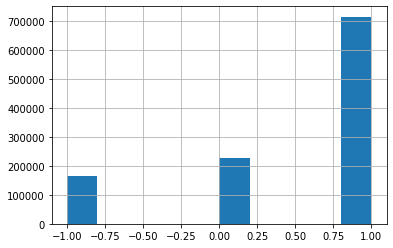

In [ ]:
df_data[df_data.score=='5'].sentiment.hist()

# Classificando 2

In [ ]:
import pandas as pd
df_test = pd.read_csv('german_absa_V1.csv')
df_test

,snippet,aspect,category,sentiment
0,Da ich dieses Kabel primär für mein HTC erworb...,Kabel,electronics,Negative
1,Die stöpsel im Ohr und Handy in der Hosentasch...,Verbindung,electronics,Negative
2,Dann ist nach gut 2 Wochen einer ganz ausgefal...,ausgefallen,electronics,Negative
3,Dann ist nach gut 2 Wochen einer ganz ausgefal...,verbinden,electronics,Negative
4,Zwar konnte ich damit Musik hören und beim Tel...,Musik,electronics,Positive
...,...,...,...,...
4654,Ich finde die Farben okay.,Farben,video_games,Positive
4655,Ich bin soweit zufrieden und Fans dürften nich...,zufrieden,video_games,Positive
4656,Für 15-18 Euro völlig okay....,15-18 Euro,video_games,Positive
4657,Es tut seinen Zweck zu meiner vollsten Zufried...,verstauben,video_games,Negative


In [ ]:
from tensorflow.keras import activations
import tensorflow
import numpy as np


train_test = []
for index,row in df_test.iterrows():
  x = [row['snippet'],row['aspect']]
  train_test.append(x)

preds = activations.softmax(tensorflow.convert_to_tensor(model.predict(train_test))).numpy()

In [ ]:
df_test['sentiment_pred'] = np.argmax(preds,axis=1)-1
df_test['sentiment_pred_prob'] = np.max(preds,axis=1)

In [ ]:
df_test

,snippet,aspect,category,sentiment,sentiment_pred,sentiment_pred_prob
0,Da ich dieses Kabel primär für mein HTC erworb...,Kabel,electronics,Negative,-1,0.999714
1,Die stöpsel im Ohr und Handy in der Hosentasch...,Verbindung,electronics,Negative,-1,0.999774
2,Dann ist nach gut 2 Wochen einer ganz ausgefal...,ausgefallen,electronics,Negative,-1,0.999770
3,Dann ist nach gut 2 Wochen einer ganz ausgefal...,verbinden,electronics,Negative,-1,0.999736
4,Zwar konnte ich damit Musik hören und beim Tel...,Musik,electronics,Positive,1,0.999670
...,...,...,...,...,...,...
4654,Ich finde die Farben okay.,Farben,video_games,Positive,1,0.999884
4655,Ich bin soweit zufrieden und Fans dürften nich...,zufrieden,video_games,Positive,1,0.999861
4656,Für 15-18 Euro völlig okay....,15-18 Euro,video_games,Positive,1,0.999852
4657,Es tut seinen Zweck zu meiner vollsten Zufried...,verstauben,video_games,Negative,-1,0.999178


In [ ]:
df_test.sentiment.unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [ ]:
L = []
for index,row in df_test.iterrows():
  sentiment_pred_label= ''
  if row['sentiment_pred']==-1: sentiment_pred_label = 'Negative'
  if row['sentiment_pred']==1: sentiment_pred_label = 'Positive'
  if row['sentiment_pred']==0: sentiment_pred_label = 'Neutral'
  L.append(sentiment_pred_label)

df_test['sentiment_pred_label'] = L
df_test

,snippet,aspect,category,sentiment,sentiment_pred,sentiment_pred_prob,sentiment_pred_label
0,Da ich dieses Kabel primär für mein HTC erworb...,Kabel,electronics,Negative,-1,0.999714,Negative
1,Die stöpsel im Ohr und Handy in der Hosentasch...,Verbindung,electronics,Negative,-1,0.999774,Negative
2,Dann ist nach gut 2 Wochen einer ganz ausgefal...,ausgefallen,electronics,Negative,-1,0.999770,Negative
3,Dann ist nach gut 2 Wochen einer ganz ausgefal...,verbinden,electronics,Negative,-1,0.999736,Negative
4,Zwar konnte ich damit Musik hören und beim Tel...,Musik,electronics,Positive,1,0.999670,Positive
...,...,...,...,...,...,...,...
4654,Ich finde die Farben okay.,Farben,video_games,Positive,1,0.999884,Positive
4655,Ich bin soweit zufrieden und Fans dürften nich...,zufrieden,video_games,Positive,1,0.999861,Positive
4656,Für 15-18 Euro völlig okay....,15-18 Euro,video_games,Positive,1,0.999852,Positive
4657,Es tut seinen Zweck zu meiner vollsten Zufried...,verstauben,video_games,Negative,-1,0.999178,Negative


In [ ]:
list(df_test.aspect.unique())

['Kabel',
 'Verbindung',
 'ausgefallen',
 'verbinden',
 'Musik',
 'Telefonieren',
 'Kommunikation',
 'Qualität',
 'fehlkauf',
 'Schlaufe',
 'band',
 'Anwendung',
 'aufzuladen',
 'anzuschließen',
 'bequem',
 'Sound',
 'Akkulaufzeit',
 'Preis',
 'Kompatibel',
 'aufladen',
 'Schließmechanismus',
 'Adapter',
 'Ohrstecker',
 'Musikhören',
 'zurückgeschickt',
 'zufrieden',
 'Leistung',
 'original Schlüssel',
 'Akustik',
 'Bluetooth',
 'Kontakt',
 'hochwertigen',
 'Akku',
 'Wasserfest',
 'Lautstärke',
 'Bass',
 'Störungen',
 'Lautsprecher',
 'Druck',
 'Verarbeitung',
 'Anschlussklemmen',
 'Federbelastet',
 'Leitungen',
 'Übergangswiderstand',
 'Kaufempfehlung',
 'Magnete',
 'Tasche',
 'Zubehör',
 'Ohrhörer',
 'Telefon',
 'stark mitgenommen',
 'Rändern',
 'Optisch',
 'Klettverschluss',
 'Montage',
 'Reciver',
 'Internetradio',
 'USB',
 'App',
 'akku',
 'in Ear Hörer',
 'bedienbar',
 'Klang',
 'koppeln',
 'Kopfhörer',
 'Lieferumfang',
 'laden',
 'Verbinden',
 'einfach',
 'schnell',
 'zurück ges

In [ ]:
df_test.to_excel('german_basa_V1_multilingual_model1_eval.xls')

In [ ]:
df_test.sentiment_pred_label.unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

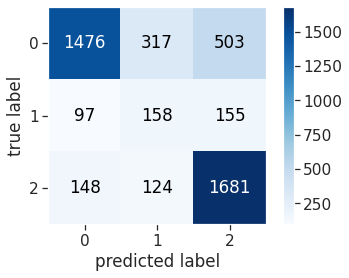

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = df_test.sentiment.to_list()
y_pred = df_test.sentiment_pred_label.to_list()
confusion_matrix(y_true, y_pred)

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False, 
                                )
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_true = df_test.sentiment.to_list()
y_pred = df_test.sentiment_pred_label.to_list()
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

    Negative       0.86      0.64      0.73      2296
     Neutral       0.26      0.39      0.31       410
    Positive       0.72      0.86      0.78      1953

    accuracy                           0.71      4659
   macro avg       0.61      0.63      0.61      4659
weighted avg       0.75      0.71      0.72      4659

